In [1]:
from audiodiffusion.audio_encoder import AudioEncoder
import torchaudio
import os
from tqdm import tqdm
import random as r
# from sklearn import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#https://huggingface.co/teticio/audio-encoder
audio_encoder = AudioEncoder.from_pretrained("teticio/audio-encoder")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [4]:
path = "data/rendered_audio/rendered_audio/"
files = os.listdir(path)
r.shuffle(files)
fs = []
embeddings = []

for file in tqdm(files):
    if ".flac" in file:
        full_path = path + file
        fs.append(full_path)
        audio, _ = torchaudio.load(full_path)
        encoding = audio_encoder.encode([full_path])
        embeddings.append(encoding.squeeze(0).numpy())



 88%|███▌| 23907/27131 [28:09<03:47, 14.15it/s]


LibsndfileError: Error opening 'data/rendered_audio/rendered_audio/d270f326-a3f6-4807-ac06-8716c9166ad1.flac': Format not recognised.

In [5]:
pca = PCA(n_components=2, svd_solver='full')
pca_ = pca.fit_transform(embeddings)

In [15]:
kmean_model = KMeans(n_clusters=12).fit(embeddings)

In [16]:
labels = kmean_model.predict(embeddings)

In [17]:
feature_a = []
feature_b = []

for i in pca_:
    feature_a.append(i[0])
    feature_b.append(i[1])

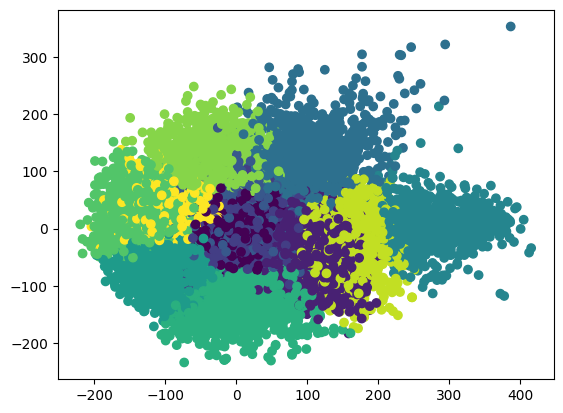

In [18]:
import matplotlib.pyplot as plt
 
#plotting the results
plt.scatter(feature_a, feature_b, c=labels)
plt.show()

In [23]:
import pandas as pd

df = pd.DataFrame()
df['file'] = fs[:23900]
df['label'] = labels[:23900]

In [24]:
df

,file,label
0,data/rendered_audio/rendered_audio/002db736-c7...,6
1,data/rendered_audio/rendered_audio/e5f327de-74...,3
2,data/rendered_audio/rendered_audio/d5e66e8a-4d...,6
3,data/rendered_audio/rendered_audio/9c6a14fc-5a...,6
4,data/rendered_audio/rendered_audio/943dbdaf-29...,10
...,...,...
23895,data/rendered_audio/rendered_audio/0cb8ce3f-4f...,8
23896,data/rendered_audio/rendered_audio/6813d598-60...,4
23897,data/rendered_audio/rendered_audio/b4a44864-ac...,5
23898,data/rendered_audio/rendered_audio/de05caea-48...,7
